In [1]:
import os

os.chdir('app/')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def form_param_string(extra_params: pd.Series):
    param_string = ', '

    for param_name in extra_params.index:
        param_string += f'{param_name}={extra_params[param_name]}, '

    param_string = param_string[:-2]
    return param_string

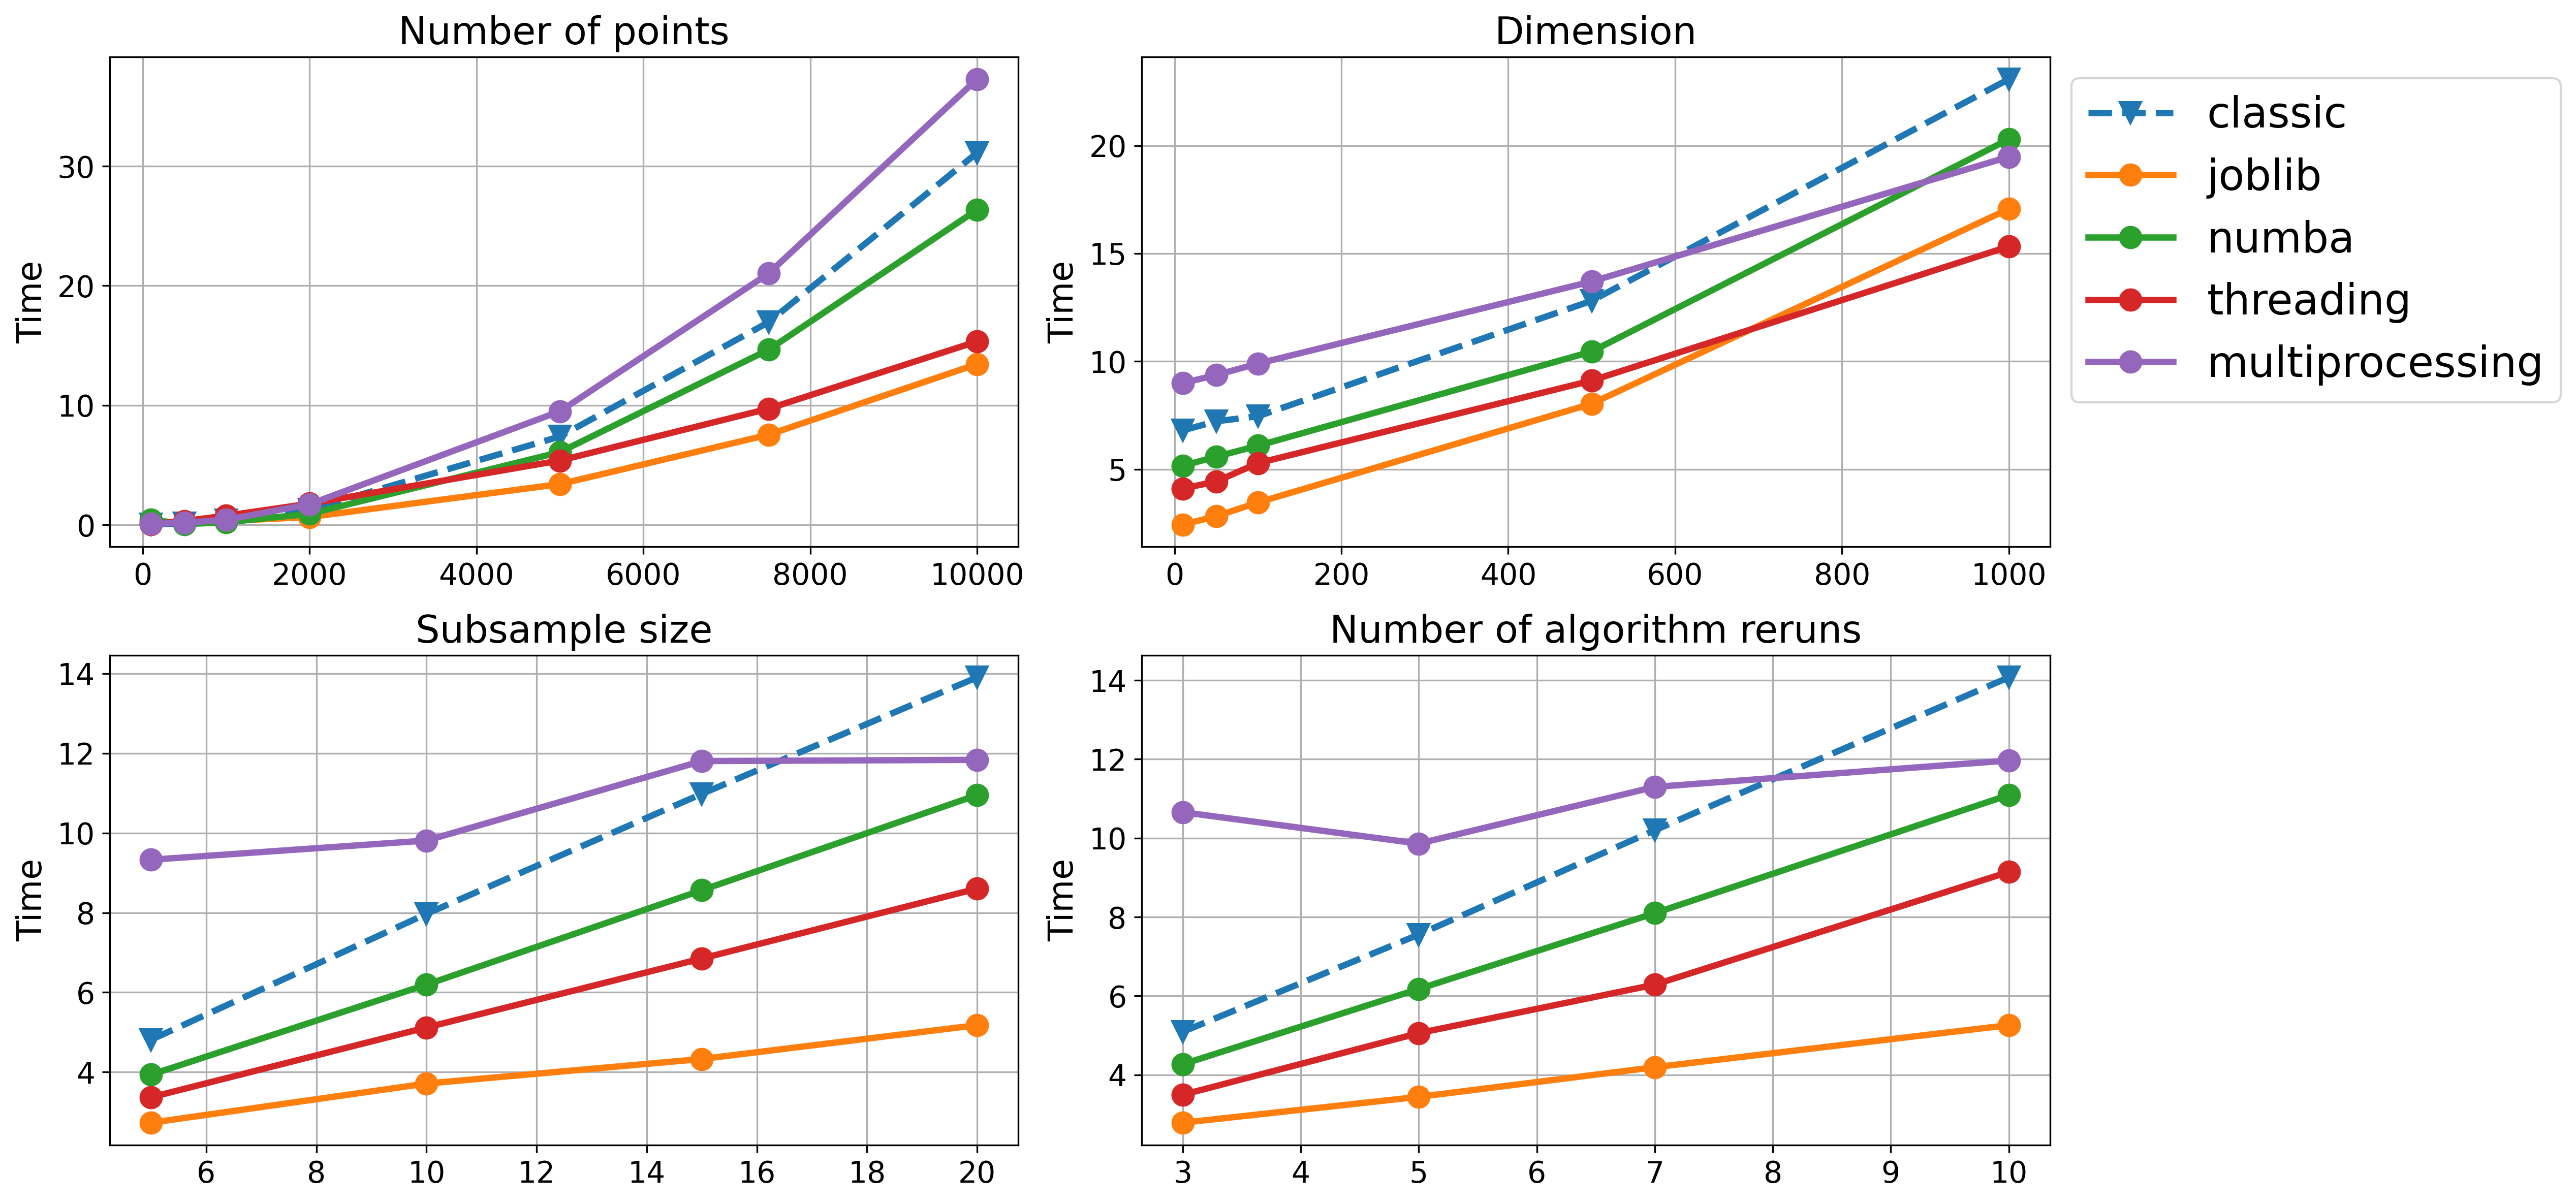

In [5]:
experiment_name = 'cdist_exp'

fig, axes = plt.subplots(2, 2, dpi=300, figsize=(17, 8))
params = ['n_space_points', 'space_dim', 'n_subsample_points',  'n_reruns_algo',]
methods = [
    'classic', 
    'joblib', 
    'numba', 
    'threading',
    'multiprocessing',
]

name_map = {
    'n_space_points': 'Number of points',
    'space_dim': 'Dimension',
    'n_subsample_points': 'Subsample size',
    'n_reruns_algo': 'Number of algorithm reruns'
}

for i, (param, ax) in enumerate(zip(params, axes.flatten())):
    for method in methods:
        results = pd.read_csv(f'results/{experiment_name}_{param}_{method}.csv')
        
        extra_params = results.iloc[0][params].drop(param)
        
        linestyle = '--' if method == 'classic' else '-'
        marker = 'v' if method == 'classic' else 'o'

        ax.plot(results[param], results['time_mean'], linestyle=linestyle, label=method, marker=marker, linewidth=3, ms=10)

        # stderr = results['time_mean'] #/ np.sqrt(20)#results['n_rerun_time'])

        # ax.fill_between(results[param], results['time_mean'] - 2*stderr, results['time_mean'] + 2*stderr, alpha=.1)

    ax.set_title(name_map[param], fontsize=18)
    ax.set_ylabel('Time', fontsize=16)
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.grid()

    if i == 1:
        ax.legend(bbox_to_anchor=(1, 1), fontsize=20)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Whole algorithm complexity')

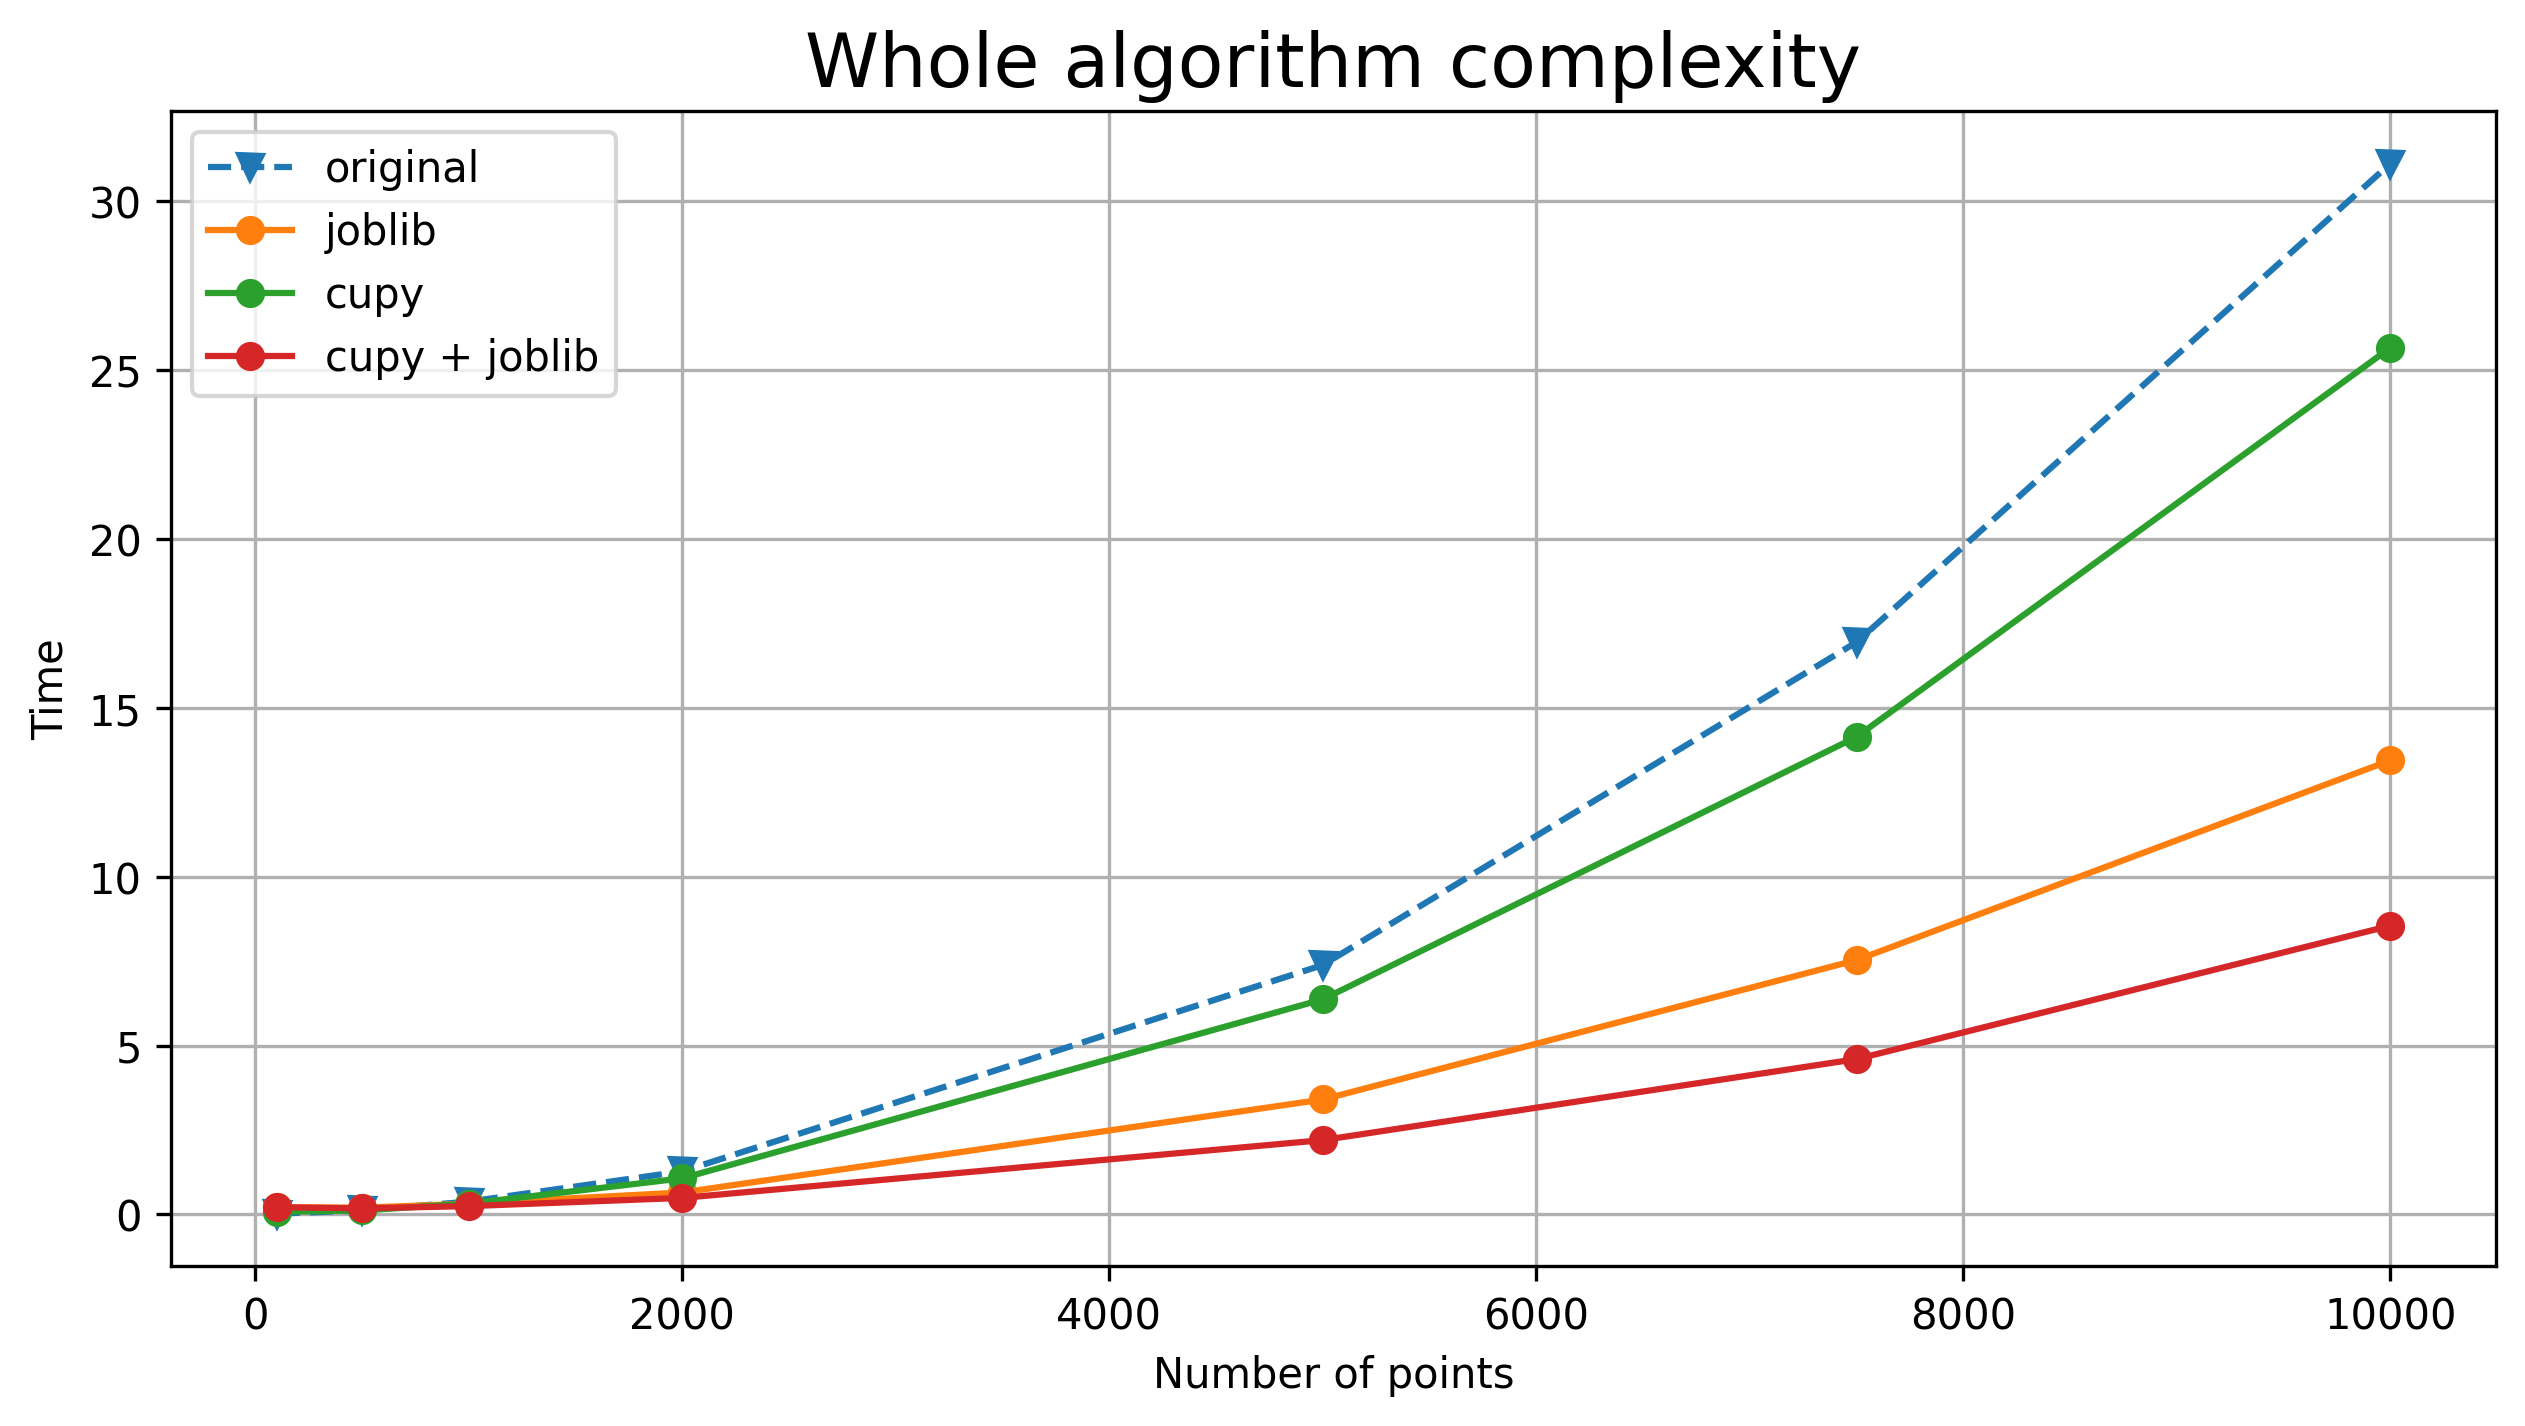

In [11]:
plt.figure(figsize=(10, 5), dpi=300)

results_cdist = pd.read_csv('results/cdist_exp_n_space_points_classic.csv')
results_cupy = pd.read_csv('results/night_exp_n_space_points_classic.csv')
results_cupy_joblib = pd.read_csv('results/night_exp_n_space_points_joblib.csv')
results_joblib = pd.read_csv('results/cdist_exp_n_space_points_joblib.csv')

plt.plot(results_cdist['n_space_points'], results_cdist['time_mean'], label='original', linestyle='--', marker='v')
plt.plot(results_joblib['n_space_points'], results_joblib['time_mean'], label='joblib', marker='o')
plt.plot(results_cupy['n_space_points'], results_cupy['time_mean'], label='cupy', marker='o')
plt.plot(results_cupy_joblib['n_space_points'], results_cupy_joblib['time_mean'], label='cupy + joblib', marker='o')


plt.grid()
plt.legend()
plt.ylabel('Time')
plt.xlabel('Number of points')
plt.title('Whole algorithm complexity', fontsize=18)